In [1]:
#Importing Libraries
import numpy as nmp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)


In [2]:
#Loading data set into dataframes
house_df=pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_df.shape

(1460, 81)

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
null = pd.DataFrame(round(house_df.isnull().sum()/len(house_df.index)*100,2).sort_values(ascending=False),columns=["Null vaue in %"])
null.index.name = 'Features'
null.head(10)

,Null vaue in %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55


In [8]:
#dropping columns with maximum % (>40%) of missing value
house_df = house_df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [9]:
house_df.shape

(1460, 74)

In [10]:
#Categorical columns
house_df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# Numeric columns
house_df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
#checking the higesht percentage of missing values

null = pd.DataFrame(round(house_df.isnull().sum()/len(house_df.index)*100,2).sort_values(ascending=False),columns=["Null Values %"])
null.index.name = 'Features'
null_df = null[null["Null Values %"] > 0]
null_df

,Null Values %
Features,
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [13]:
#imputing the missing values with the median and mode since the feature contains outliers
house_df['LotFrontage'] = house_df['LotFrontage'].fillna(house_df['LotFrontage'].median())
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].median())

for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):   
    house_df[col] = house_df[col].fillna(house_df[col].mode()[0])
    
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):    
    house_df[col] = house_df[col].fillna(house_df[col].mode()[0])
    
for col in ('MasVnrArea', 'Electrical'):
    house_df[col] =house_df[col].fillna(house_df[col].mode()[0])

In [14]:
# checking for the presence of any more null values
null = pd.DataFrame(round(house_df.isnull().sum()/len(house_df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


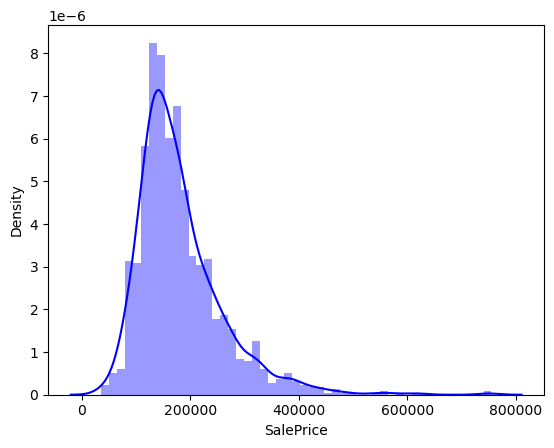

In [15]:
# EDA and Visualization
#Identifying the outliers
plt.figure()
sns.distplot(house_df['SalePrice'],color='b')
plt.show()

In [16]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']
Q1 = house_df[cols].quantile(0.05)
Q3 = house_df[cols].quantile(0.95)
IQR = Q3 - Q1

house_df = house_df[~((house_df[cols] < (Q1 - 1.5 * IQR)) |(house_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

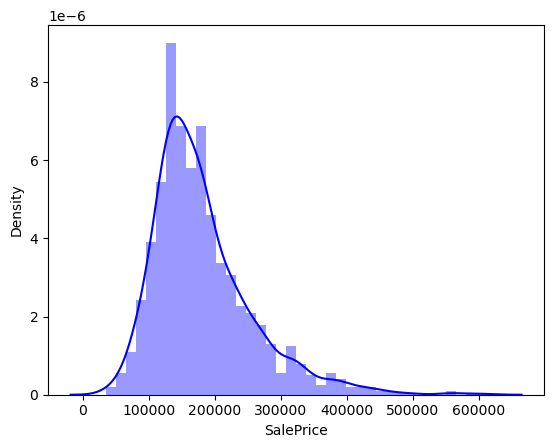

In [17]:
plt.figure()
sns.distplot(house_df['SalePrice'],color='b')
plt.show()

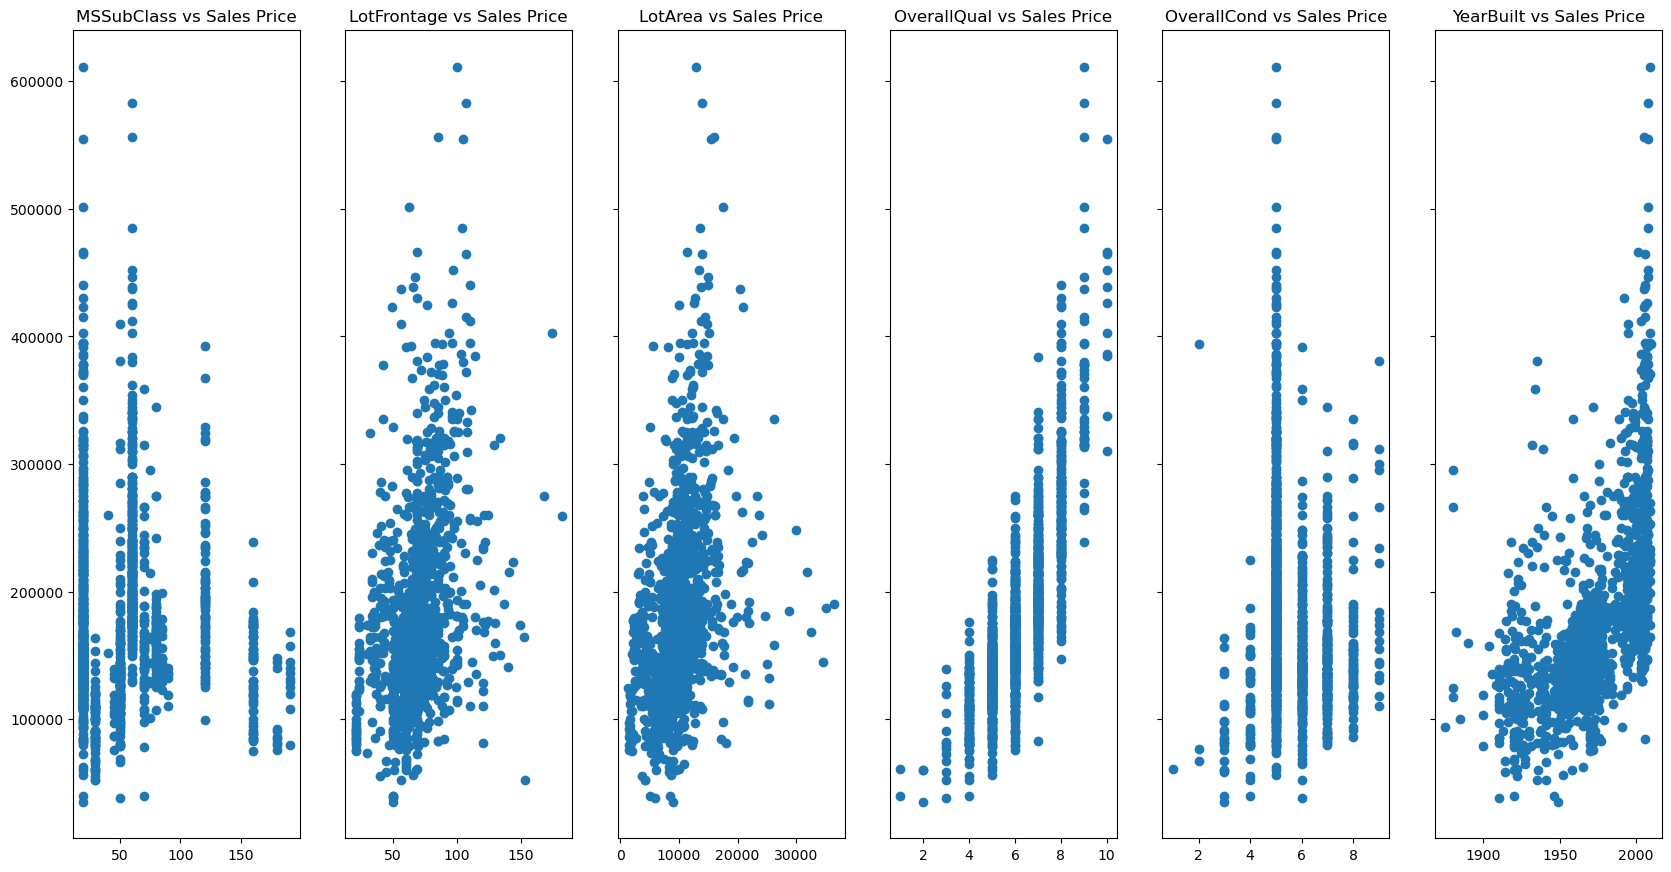

In [18]:
# drawing plots for predictors vs sales price
#['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(house_df['MSSubClass'], house_df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales Price')

LotArea = ax[2].scatter(house_df['LotArea'], house_df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales Price')

LotFrontage= ax[1].scatter(house_df['LotFrontage'], house_df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales Price')

OverallCond = ax[4].scatter(house_df['OverallCond'], house_df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales Price')

OverallQual = ax[3].scatter(house_df['OverallQual'], house_df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales Price')

YearBuilt = ax[5].scatter(house_df['YearBuilt'], house_df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales Price')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()


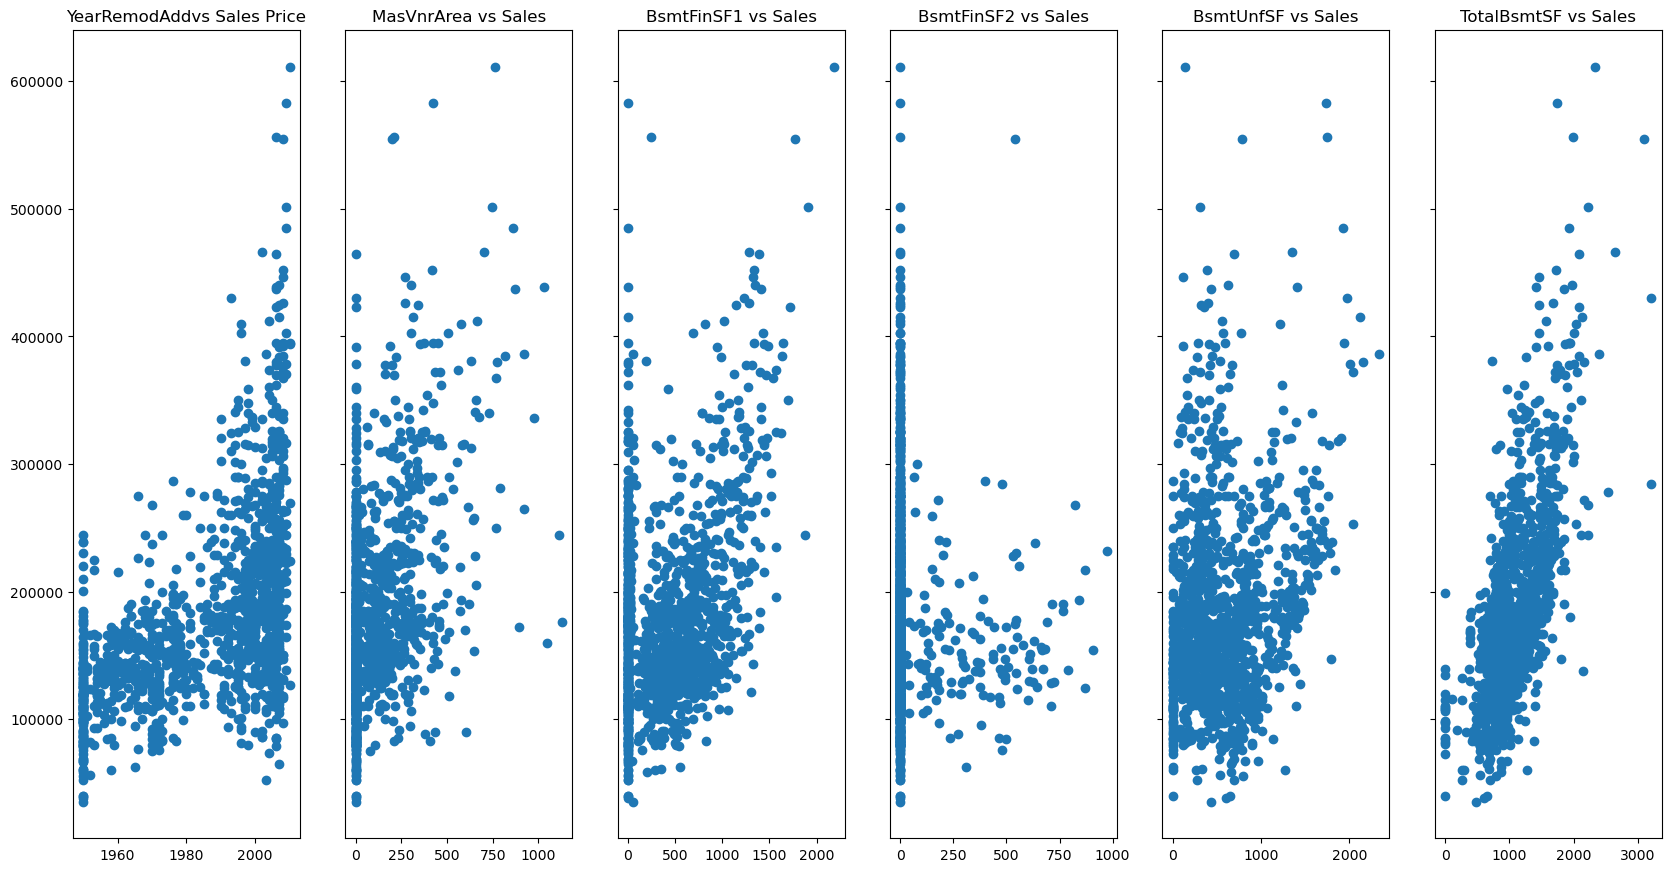

In [19]:
# drawing plots for predictors vs sales price
#['YearRemodAdd','BsmtFinSF1', 
#'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(house_df['YearRemodAdd'], house_df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales Price')

BsmtFinSF1 = ax[2].scatter(house_df['BsmtFinSF1'], house_df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

MasVnrArea= ax[1].scatter(house_df['MasVnrArea'], house_df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF2 = ax[3].scatter(house_df['BsmtFinSF2'], house_df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

TotalBsmtSF = ax[5].scatter(house_df['TotalBsmtSF'], house_df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')

BsmtUnfSF = ax[4].scatter(house_df['BsmtUnfSF'],house_df['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()


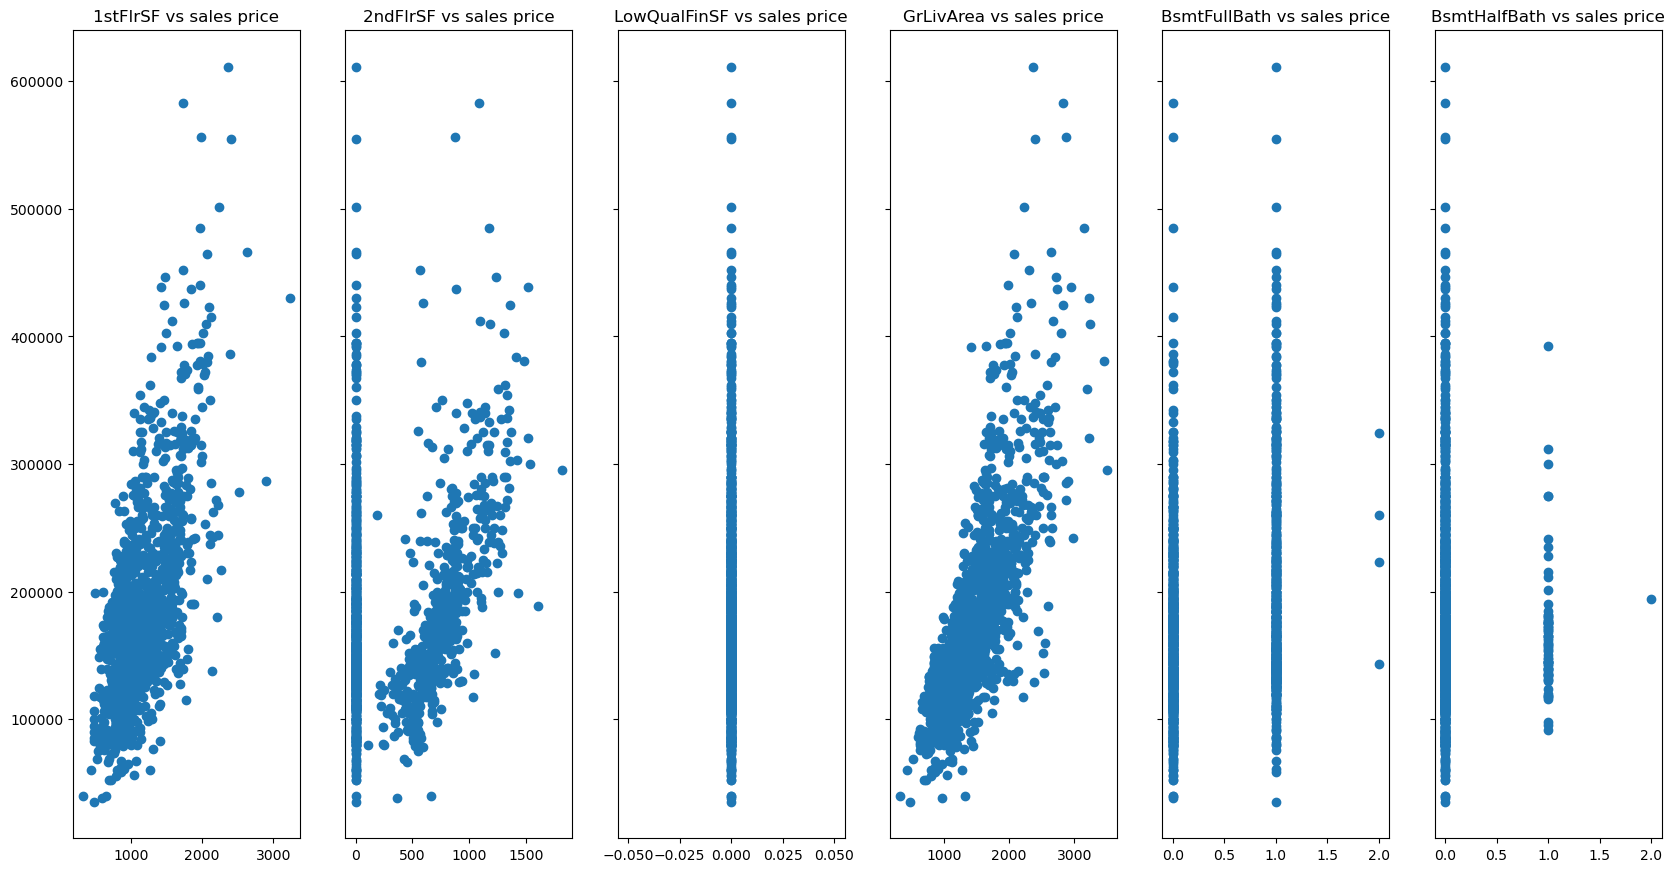

In [20]:
# drawing plots for predictors vs sales price
#['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(house_df['1stFlrSF'], house_df['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs sales price')

ndFlrSF= ax[1].scatter(house_df['2ndFlrSF'], house_df['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs sales price')

LowQualFinSF = ax[2].scatter(house_df['LowQualFinSF'], house_df['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs sales price')

GrLivArea = ax[3].scatter(house_df['GrLivArea'], house_df['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs sales price')

BsmtFullBath = ax[4].scatter(house_df['BsmtFullBath'], house_df['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs sales price')

BsmtHalfBath = ax[5].scatter(house_df['BsmtHalfBath'], house_df['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs sales price')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

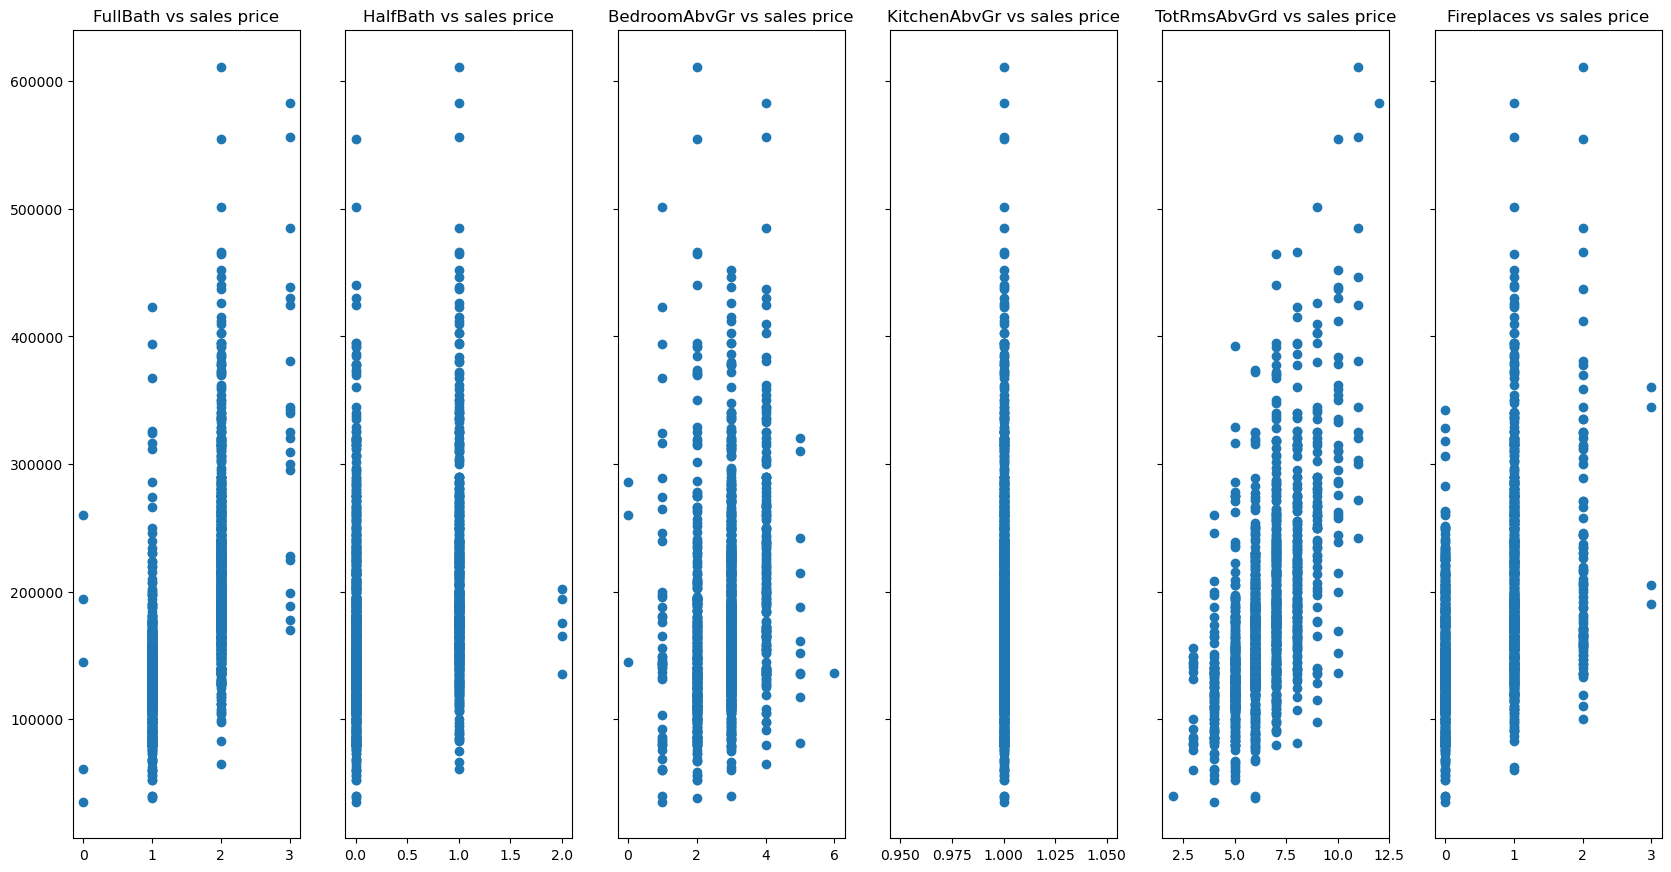

In [21]:
# drawing plots for predictors vs sales price
#['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(house_df['FullBath'], house_df['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs sales price')

HalfBath= ax[1].scatter(house_df['HalfBath'], house_df['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs sales price')

BedroomAbvGr = ax[2].scatter(house_df['BedroomAbvGr'], house_df['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs sales price')

KitchenAbvGr = ax[3].scatter(house_df['KitchenAbvGr'], house_df['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs sales price')

TotRmsAbvGrd = ax[4].scatter(house_df['TotRmsAbvGrd'], house_df['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs sales price')

Fireplaces = ax[5].scatter(house_df['Fireplaces'], house_df['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs sales price')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

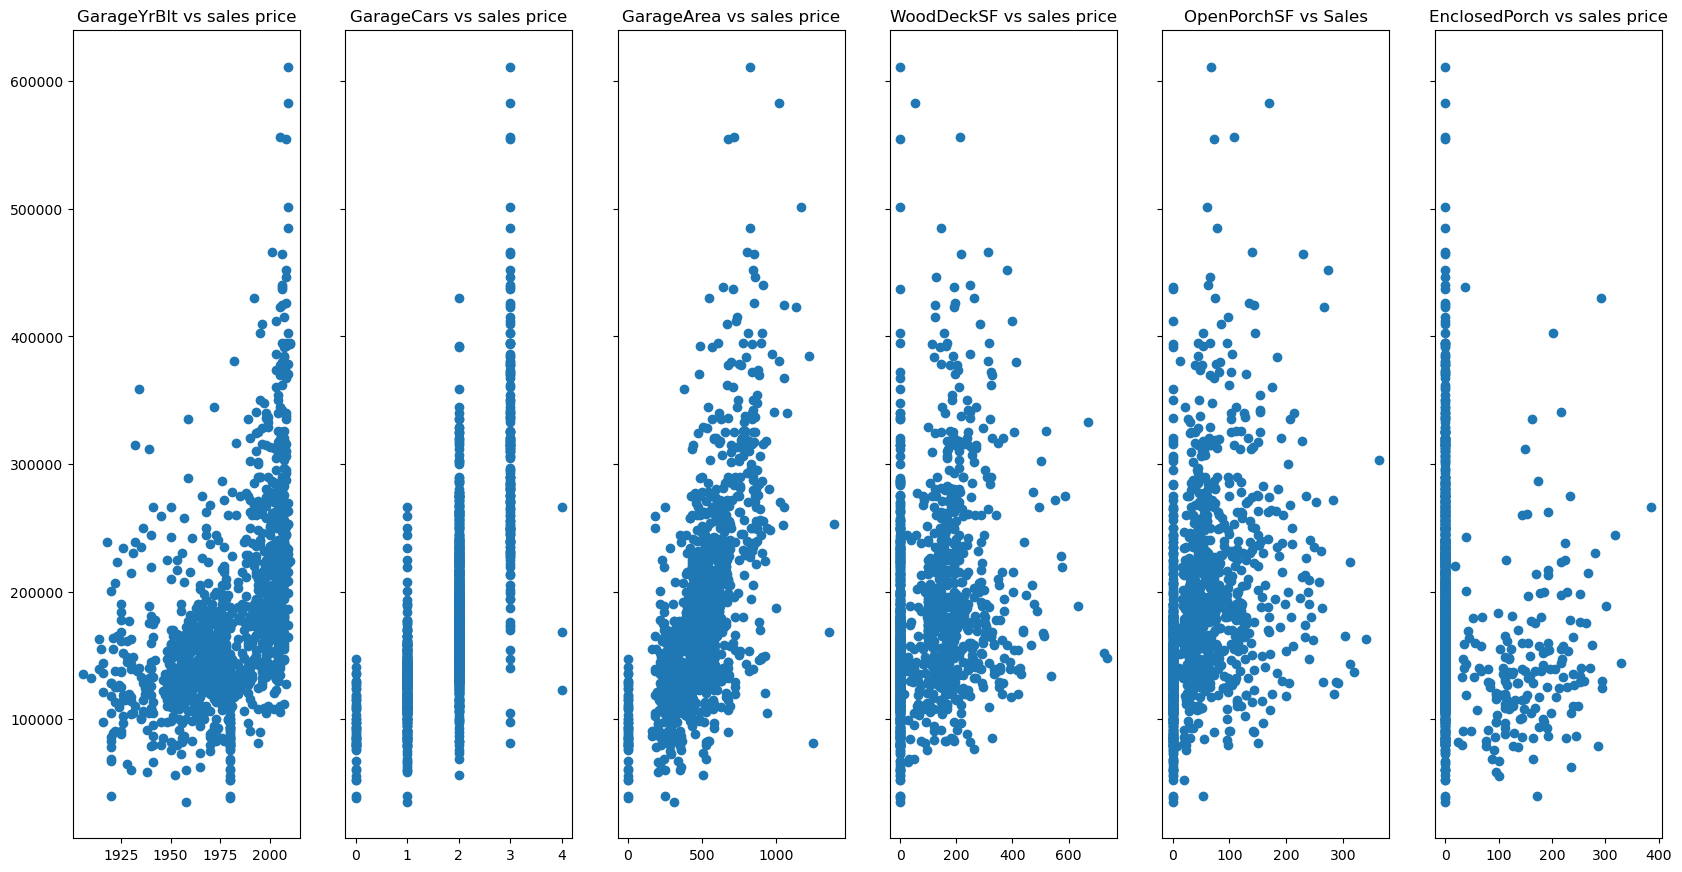

In [22]:
# drawing plots for predictors vs sales price
#[GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(house_df['GarageYrBlt'], house_df['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs sales price')

GarageCars= ax[1].scatter(house_df['GarageCars'], house_df['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs sales price')

GarageArea = ax[2].scatter(house_df['GarageArea'], house_df['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs sales price')

WoodDeckSF = ax[3].scatter(house_df['WoodDeckSF'], house_df['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs sales price')

OpenPorchSF = ax[4].scatter(house_df['OpenPorchSF'], house_df['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(house_df['EnclosedPorch'], house_df['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs sales price')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

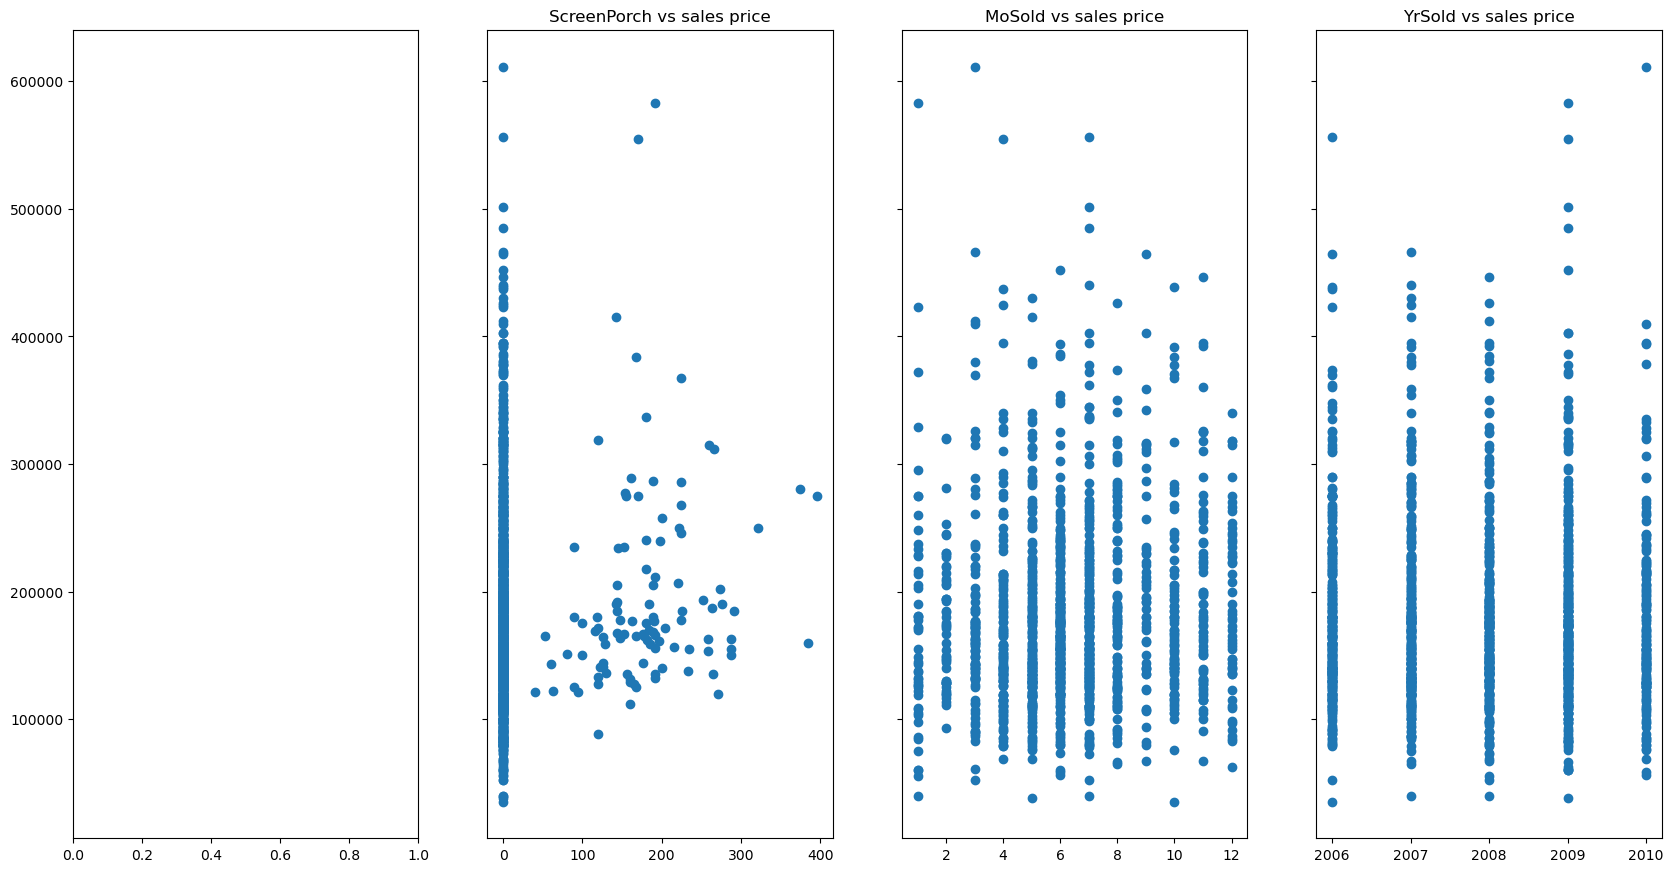

In [23]:
# drawing plots for predictors vs sales price
#['ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorch= ax[1].scatter(house_df['ScreenPorch'], house_df['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs sales price')

MoSold = ax[2].scatter(house_df['MoSold'], house_df['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSold vs sales price')

YrSold = ax[3].scatter(house_df['YrSold'], house_df['SalePrice'])
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs sales price')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [24]:
#Categorical columns
house_df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
# Convert categorical value into Dummy variable
house_df=pd.get_dummies(house_df,dtype='int',drop_first=True)
house_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
# Splitting data into test and trainging data sets
#Split the data into train and test
y = house_df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
X = house_df
X.shape

(1333, 221)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)

In [29]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
744,120,41.0,5395,8,5,1993,1993,0.0,733,0,604,1337,1337,0,0,1337,1,0,2,0,2,1,5,1,1993.0,2,462,96,0,70,168,0,0,0,10,2008,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
496,20,69.0,12692,8,5,1992,1993,0.0,1231,0,1969,3200,3228,0,0,3228,1,0,3,0,4,1,10,1,1992.0,2,546,264,75,291,0,0,0,0,5,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1213,80,69.0,10246,4,9,1965,2001,0.0,648,0,0,648,960,0,0,960,1,1,0,0,0,1,3,0,1965.0,1,364,88,0,0,0,0,0,0,5,2006,0,0,1,0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1214,85,69.0,10205,5,5,1962,1962,0.0,784,0,141,925,999,0,0,999,1,0,1,0,3,1,6,0,1962.0,1,300,150,72,0,0,0,0,0,5,2006,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
615,85,80.0,8800,6,7,1963,1963,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,0,0,0,5,2010,0,0,1,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [30]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=221)

In [31]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
744,120,41.0,5395,8,5,1993,1993,0.0,733,0,604,1337,1337,0,0,1337,1,0,2,0,2,1,5,1,1993.0,2,462,96,0,70,0,10,2008
496,20,69.0,12692,8,5,1992,1993,0.0,1231,0,1969,3200,3228,0,0,3228,1,0,3,0,4,1,10,1,1992.0,2,546,264,75,291,0,5,2007
1213,80,69.0,10246,4,9,1965,2001,0.0,648,0,0,648,960,0,0,960,1,1,0,0,0,1,3,0,1965.0,1,364,88,0,0,0,5,2006
1214,85,69.0,10205,5,5,1962,1962,0.0,784,0,141,925,999,0,0,999,1,0,1,0,3,1,6,0,1962.0,1,300,150,72,0,0,5,2006
615,85,80.0,8800,6,7,1963,1963,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,5,2010


In [32]:
#Scaling using MinMax
scaler=MinMaxScaler()

In [33]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [34]:
# Model Building and Evaluation
# RFE

In [35]:
# Running RFE with the output number of the variable equal to 10

reg = LinearRegression()
reg.fit(X_train,y_train)

rfe = RFE(reg, step =20) 
rfe = rfe.fit(X_train, y_train)

In [36]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearBuilt', False, 4),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 6),
 ('BsmtUnfSF', False, 4),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 6),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 4),
 ('HalfBath', False, 5),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 6),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 5),
 ('GarageYrBlt', False, 4),
 ('GarageCars', False, 5),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 5),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 6),
 ('ScreenPorch', False, 4),
 ('PoolArea', False, 6),
 ('MiscVal', False, 6),
 ('MoSold', False, 5),
 ('YrSold', False, 2),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', 

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object', length=110)

In [39]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_Y', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=111)

In [40]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(399, 110)
(934, 110)
(399,)
(934,)


In [42]:
lm1=reg.fit(X_train, y_train)

In [43]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-21348.776014885574
[-5.17480410e+04  1.66319419e+04  2.36707199e+04  4.15350391e+04
  1.64219188e+04  1.85185356e+04  8.30639314e+03  8.32287817e+03
  6.85490947e+04  4.60665819e+02  1.49533270e+04  5.70450997e+04
  4.51826658e+04  7.50997650e+04  1.09691609e-06  8.02494885e+04
 -6.17994787e+03 -1.15323347e+04  5.89302072e+03 -1.80284012e+03
 -2.13072910e+04  1.86792022e-08  5.50147530e+04  8.77061755e+02
  1.14584546e+04 -1.39449189e+03  7.85984013e+03  2.24944780e+03
  1.69684064e+04  7.98708583e+03  4.57849373e+00  1.96928897e+04
 -8.20000423e-09  1.30433369e+01 -1.18872507e+03  7.96957034e+03
  3.39001829e+04 -2.02007255e+04 -2.70720541e+03 -1.09922520e+04
  7.50752090e+04 -6.65172960e+03 -3.42414186e+02  1.40317164e+03
  1.26677715e+04 -4.94867257e+03  8.23832487e+03 -2.61934474e-10
  1.09397046e+04 -1.33874134e+03 -3.51267074e+04  2.17933971e+03
  1.07806205e+04 -1.60421277e+04  1.52795110e-10 -1.41289615e+03
 -2.69899522e+04 -3.38609029e+04 -2.63022294e+04 -6.63876045e+03
 -4.6

In [45]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = nmp.sum(nmp.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = nmp.sum(nmp.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9489448429034213
-4.8426153543156446e+20
126126927577.0
2.4553721983459e+33
316107587.9122807
2.628878156687259e+30


In [ ]:
#Ridge and Lasso Regression

In [ ]:
# Ridge  Regression

In [46]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.8}
-18381.063255144894


In [49]:
alpha = 0.8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-3.85792529e+04,  8.25323543e+03,  6.56115154e+04,  4.88791797e+04,
        7.10656729e+04,  5.93589011e+04,  5.64046078e+04,  8.56087244e+04,
       -1.92391882e+04,  4.93839861e+04,  2.41328734e+04,  1.18192468e+04,
        1.85303667e+04, -1.30265052e+04,  2.28645692e+03, -7.79031834e+03,
        4.33400751e+04, -6.26682630e+03, -1.79402630e+04, -1.71645054e+04,
       -1.22880804e+04, -2.03681608e+04, -1.31828837e+04, -3.08218865e+04,
       -1.51333086e+04, -1.40606280e+04, -9.80931913e+03, -1.58140465e+04,
       -3.42291660e+04, -1.75757092e+04,  2.91183911e+04, -2.46617901e+04,
       -3.05454229e+04, -1.89383995e+04, -9.36987928e+03, -1.71797045e+04,
        2.40512895e+04, -1.08107555e+04, -2.11297548e+04,  1.81700820e+03,
       -1.60210077e+04,  1.64279805e+04,  1.46675339e+04,  8.61399381e+03,
        1.76985964e+04,  1.64311635e+04,  4.80325933e+03,  8.42900857e+03,
        1.22147043e+04, -8.28246680e+03, -8.28246680e+03,  1.13527495e+04,
       -1.30951411e+03, -

In [52]:
# calculating some metrics R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = nmp.sum(nmp.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = nmp.sum(nmp.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.941645294856099
0.874565150654427
144159769316.53003
635997739346.2656
361302679.9913033
680939763.7540318


In [ ]:
# Lasso Regression

In [53]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-18680.91273718804


In [56]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=50)

In [57]:
lasso.coef_

array([-3.88227790e+04,  3.42595258e+03,  6.90899796e+04,  4.82860465e+04,
        8.28036079e+04,  0.00000000e+00,  3.13183787e+04,  1.64183294e+05,
       -2.31109129e+04,  3.76862697e+04,  2.08553031e+04,  1.10270544e+04,
        1.64354926e+04, -0.00000000e+00,  2.78139727e+03, -5.59982770e+03,
        6.49357682e+04, -4.06146898e+03, -7.09779918e+03, -6.00530852e+03,
       -3.35881227e+03, -1.71980532e+04, -7.19887081e+03, -2.50280049e+04,
       -8.46940627e+03, -9.17643172e+03, -0.00000000e+00, -1.10659750e+04,
       -2.84342760e+04, -1.20580571e+04,  2.83823727e+04, -2.23317633e+04,
       -3.30271894e+04, -1.27223681e+04, -5.04107643e+03, -9.68520814e+03,
        2.55734405e+04, -1.17154429e+03, -1.44609805e+04, -0.00000000e+00,
       -1.08968252e+04,  1.93448517e+04,  9.06427135e+03,  1.01284151e+04,
        1.97324819e+04,  1.75559207e+04, -0.00000000e+00,  0.00000000e+00,
        5.93227308e+03, -0.00000000e+00, -0.00000000e+00,  7.69699446e+03,
        0.00000000e+00, -

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = nmp.sum(nmp.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = nmp.sum(nmp.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9395490100175454
0.8735738335367961
149338442364.44293
641024057383.6997
374281810.4372003
686321260.5821196


In [59]:
metric2

[0.941645294856099,
 0.874565150654427,
 144159769316.53003,
 635997739346.2656,
 19007.963594012468,
 26094.822546896765]

In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.489448e-01,9.416453e-01,9.395490e-01
1,R2 Score (Test),-4.842615e+20,8.745652e-01,8.735738e-01
2,RSS (Train),1.261269e+11,1.441598e+11,1.493384e+11
3,RSS (Test),2.455372e+33,6.359977e+11,6.410241e+11
4,MSE (Train),1.777941e+04,1.900796e+04,1.934636e+04
5,MSE (Test),1.621382e+15,2.609482e+04,2.619773e+04


In [ ]:
#Model Evaluation

In [61]:
ridge_pred = ridge.predict(X_test1)

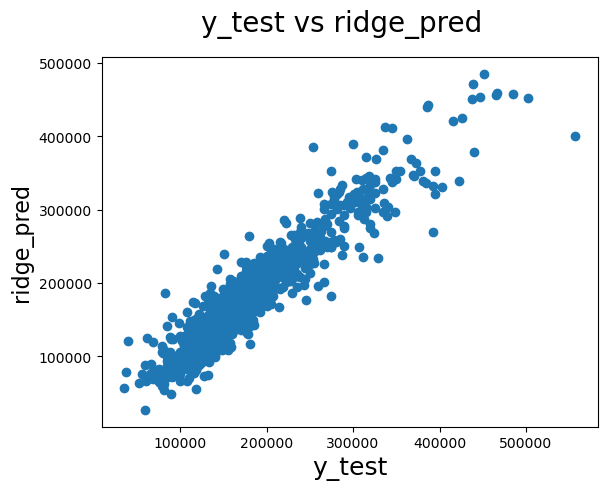

In [62]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

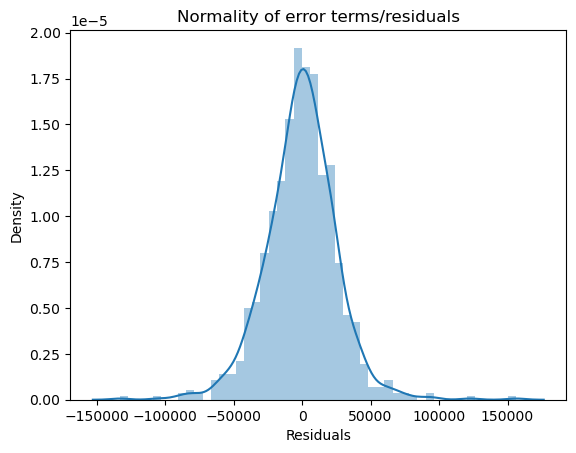

In [63]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [64]:
lasso_pred = lasso.predict(X_test1)

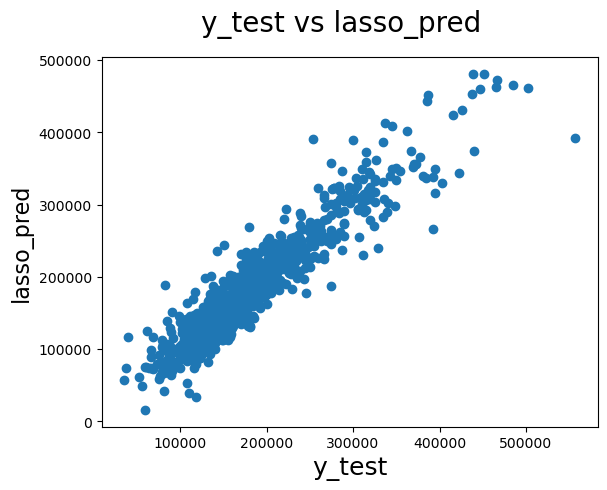

In [65]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

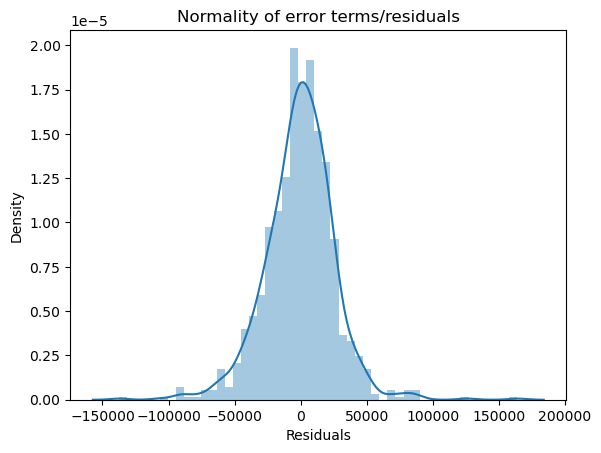

In [66]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [ ]:
# coefficients after regularization


In [67]:
betas = pd.DataFrame(index=X_train1.columns)

In [68]:
betas.rows = X_train1.columns

In [69]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-38579.252939,-38822.779033
LotArea,8253.235430,3425.952584
OverallQual,65611.515427,69089.979573
BsmtFinSF1,48879.179658,48286.046459
TotalBsmtSF,71065.672934,82803.607950
1stFlrSF,59358.901062,0.000000
2ndFlrSF,56404.607816,31318.378651
GrLivArea,85608.724352,164183.294457
BedroomAbvGr,-19239.188187,-23110.912892
TotRmsAbvGrd,49383.986120,37686.269697
